Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---


# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

In [1]:
DATA_PATH = '../data/'

In [103]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, r2_score
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

In [85]:
def wrangle(filepath):
    df = pd.read_csv(filepath, parse_dates= ['Year'], index_col= ['Year', 'Country'])
    # settings to display all columns
    pd.set_option("display.max_columns", None)
    df.dropna(inplace=True)
    return df

    
df = wrangle(DATA_PATH+ 'Unit 2 project/led.csv')    

In [86]:
print(df.shape)
df.head(20)

(1649, 20)


,,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
Year,Country,,,,,,,,,,,,,,,,,,,,
2015-01-01,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
2014-01-01,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2013-01-01,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
2012-01-01,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
2011-01-01,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
2010-01-01,Afghanistan,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
2009-01-01,Afghanistan,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
2008-01-01,Afghanistan,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
2007-01-01,Afghanistan,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4


In [52]:
df.isnull().sum()

Country                         0
Status                          0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2015-01-01 to 2000-01-01
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1649 non-null   object 
 1   Status                        1649 non-null   object 
 2   Lifeexpectancy                1649 non-null   float64
 3   AdultMortality                1649 non-null   float64
 4   infantdeaths                  1649 non-null   int64  
 5   Alcohol                       1649 non-null   float64
 6   percentageexpenditure         1649 non-null   float64
 7   HepatitisB                    1649 non-null   float64
 8   Measles                       1649 non-null   int64  
 9   BMI                           1649 non-null   float64
 10  under-fivedeaths              1649 non-null   int64  
 11  Polio                         1649 non-null   float64
 12  Totalexpenditure              1649 non-null 

C:\Users\dburn\.virtualenvs\GitHub-83uqIelY\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


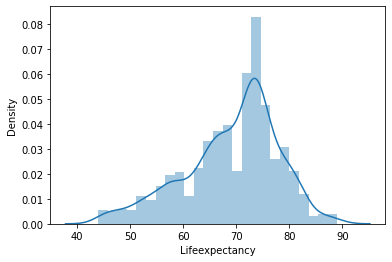

In [87]:
%matplotlib inline
import seaborn as sns
sns.distplot(y_train);

In [88]:
target = 'Lifeexpectancy'
X = df.drop(columns= target)
y = df[target]

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=42)

In [90]:
model = make_pipeline(
    TargetEncoder(),  
    StandardScaler(),
    LinearRegression()
)

model.fit(X_train, y_train)
print('Linear Regression R^2', model.score(X_val, y_val))

Linear Regression R^2 0.8031719262621922


In [91]:
ridge = make_pipeline(
    TargetEncoder(),  
    Ridge()
)

ridge.fit(X_train, y_train)
print('Linear Regression R^2', ridge.score(X_val, y_val))

Linear Regression R^2 0.8024556240790949


C:\Users\dburn\.virtualenvs\GitHub-83uqIelY\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.75532e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [98]:
model_xgb = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    SimpleImputer(),
    GradientBoostingRegressor()
)

model_xgb.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Status'],
                                mapping=[{'col': 'Status',
                                          'data_type': dtype('O'),
                                          'mapping': Developing    1
Developed     2
NaN          -2
dtype: int64}])),
                ('standardscaler', StandardScaler()),
                ('simpleimputer', SimpleImputer()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [99]:
print('Gradient Boost Training Accuracy', model_xgb.score(X_train, y_train))
print('Gradient Boost Validation Accuracy', model_xgb.score(X_val, y_val))

Gradient Boost Training Accuracy 0.9665964867521087
Gradient Boost Validation Accuracy 0.925991798082055


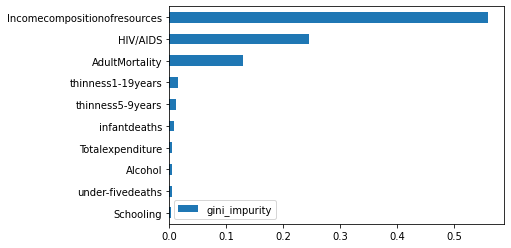

In [100]:
importances = model_xgb.named_steps['gradientboostingregressor'].feature_importances_

gini_imp = pd.DataFrame(data=importances, index=X_val.columns, columns=['gini_impurity']).sort_values(by='gini_impurity')

gini_imp.tail(10).plot(kind='barh');

In [108]:
gb = make_pipeline(
    OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.9447039537115276


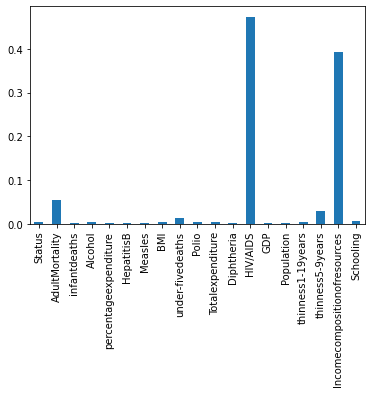

In [109]:
pd.Series(gb.named_steps['xgbregressor'].feature_importances_, index=X_val.columns).plot(kind='bar');